In [37]:
%load_ext autoreload
%autoreload 2
%matplotlib inline 


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
import os
from os.path import join
import pandas as pd
from src.config import RESULTS, FIGURES_DIR, ROOT_DIR
from src.calculate_AF_by_cell import calculate_af
#ref_fa = "/data2/genome/human_GRCh38/cellranger/refdata-cellranger-GRCh38-3.0.0/fasta/genome.fa"
ref_fa="/data2/mito_lineage/BWA-Primers-MT/MT_genome/MT.fasta"
maxBP = 16571


Project Directory: /data2/mito_lineage


In [3]:
from matplotlib_venn import venn2


In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

In [39]:
from mplh import cluster_help

here


In [6]:
os.chdir(ROOT_DIR)

## Files setup

In [7]:
indir=join(RESULTS,"mttrace")
mapq = "mapq_0"
num_reads = 200
flt3 = "CD34_Flt3L_mt_PolydT"
wt = "CD34_mt_PolydT"



flt3_indir = join(indir, flt3,"mapq_30")
wt_indir = join(indir, wt,"mapq_30")

# sc_coverage_flt3_f = join(flt3_indir,"scPileup_concat_200",flt3+"_200_all.coverage.txt.gz")
# sc_coverage_wt_f = join(wt_indir,"scPileup_concat_200",wt + "_200_all.coverage.txt.gz")

coverage_flt3_dir = join(flt3_indir,flt3+"_scPileup_200")
coverage_wt_dir = join(wt_indir,wt+"_scPileup_200")

concat_flt3_dir = join(flt3_indir,"scPileup_concat_200")
concat_wt_dir = join(wt_indir,"scPileup_concat_200")

In [8]:
outdir = join(indir, "lineage_trace/CD34_mt_polydT/het/")
if not os.path.exists(outdir):
    os.makedirs(outdir)
outdir

'/data2/mito_lineage/data/processed/mttrace/lineage_trace/CD34_mt_polydT'

### Get CD34 with and without Flt3L, first using polydT+mt
### Create allele frequency matrix for both, but add metadata for each cell about which experiment it came from
### Cluster and look

### Additional requirements is to remove poor-quality variants of BQ- see if Erick has the code of the mixture model

In [23]:
min_cells=100
min_reads=10
topN=500
het_thresh = 0.2
min_het_cells = 10

In [10]:
print(ref_fa)
print(maxBP)
print(coverage_wt_dir)
print(concat_wt_dir)

/data2/mito_lineage/BWA-Primers-MT/MT_genome/MT.fasta
16571
/data2/mito_lineage/data/processed/mttrace/CD34_mt_PolydT/mapq_30/CD34_mt_PolydT_scPileup_200
/data2/mito_lineage/data/processed/mttrace/CD34_mt_PolydT/mapq_30/scPileup_concat_200


In [11]:
wt_AF_by_cell, wt_bq_by_cell, wt_af, wt_bq_df, wt_nt_df = calculate_af(coverage_wt_dir, concat_wt_dir, ref_fasta=ref_fa,AF_F=None, maxBP=maxBP, topN=topN, min_cells=min_cells, 
                                                        min_reads=min_reads,
                                                       het_thresh=het_thresh,
                                                       min_het_cells=min_het_cells)

no alt count 5331
Number of positions to keep : 465
Number of cells to keep : 500


In [18]:
wt_AF_by_cell

,8399C,9449T
GTGGGTCGTCGGATCC-1,0.000000,0.000000
AACACGTTCCAATGGT-1,0.000000,0.000000
GTCAAGTCAACGATGG-1,0.000000,0.000000
TGTGGTATCACCCTCA-1,0.000000,0.000000
TATCTCAAGGTAGCCA-1,0.000000,0.000000
...,...,...
GGACAGAAGTTCGCAT-1,0.000000,0.000000
TTGCGTCTCTCAAACG-1,0.055556,0.000000
GACGGCTCATTTCACT-1,0.000000,0.333333
ACACTGAAGAAAGTGG-1,0.000000,0.000000


(array([464.,  16.,   5.,   7.,   0.,   5.,   0.,   2.,   0.,   1.]),
 array([0.        , 0.06666667, 0.13333333, 0.2       , 0.26666667,
        0.33333333, 0.4       , 0.46666667, 0.53333333, 0.6       ,
        0.66666667]),
 <a list of 10 Patch objects>)

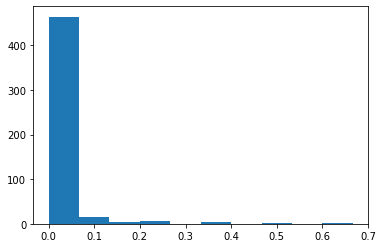

In [17]:
%matplotlib inline
plt.hist(wt_AF_by_cell["8399C"])

(array([406.,  10.,  31.,  16.,  13.,   8.,   3.,   5.,   3.,   5.]),
 array([0.        , 0.04285714, 0.08571429, 0.12857143, 0.17142857,
        0.21428571, 0.25714286, 0.3       , 0.34285714, 0.38571429,
        0.42857143]),
 <a list of 10 Patch objects>)

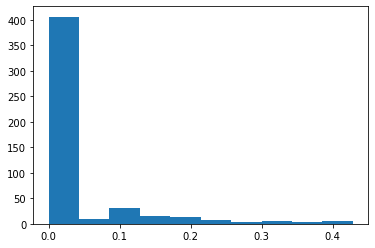

In [19]:
%matplotlib inline
plt.hist(wt_AF_by_cell["9449T"])

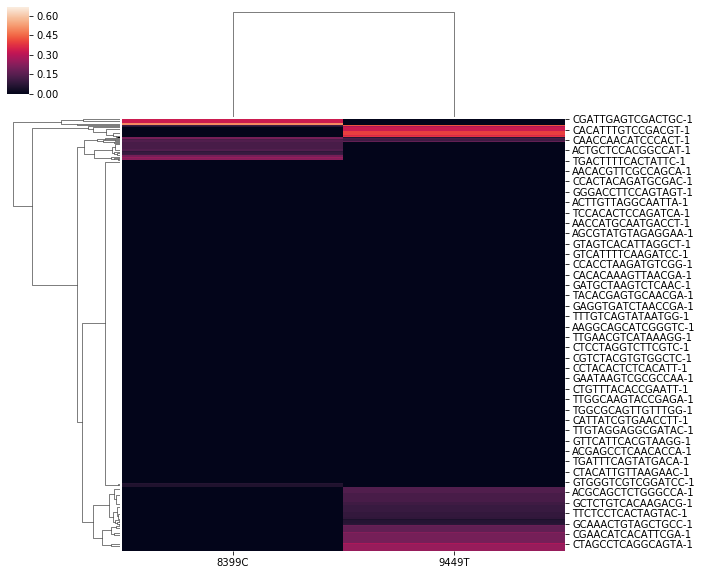

In [20]:
sns.clustermap(wt_AF_by_cell)

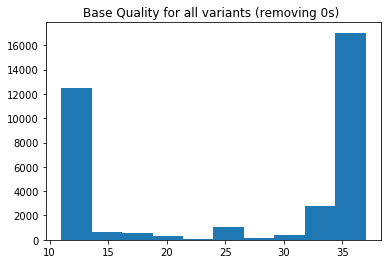

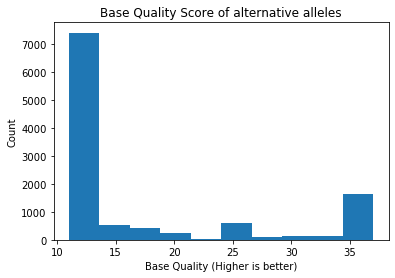

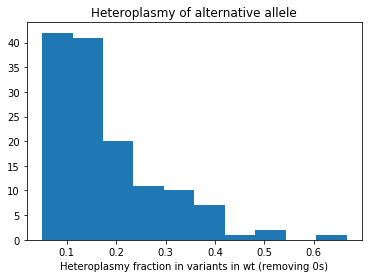

In [17]:
# %matplotlib inline
# f = plt.figure()
# bq_vals = wt_bq_df.values.flatten()
# plt.hist(bq_vals[bq_vals>0])
# plt.title("Base Quality for all variants (removing 0s) ")
# plt.savefig(join(outdir, "wt_base_quality.png"))

# plt.figure()
# plt.hist(wt_af["Alternative BQ"])
# plt.title("Base Quality Score of alternative alleles")
# plt.xlabel("Base Quality (Higher is better)")
# plt.ylabel("Count")
# plt.savefig(join(outdir, "wt_base_quality_altAllele.png"))


# f = plt.figure()
# af_vals = wt_AF_by_cell.values.flatten()
# plt.hist(af_vals[af_vals>0])
# plt.title("Heteroplasmy of alternative allele")
# plt.xlabel("Heteroplasmy fraction in variants in wt (removing 0s)")
# plt.savefig(join(outdir, "wt_heteroplasmy_values.png"))


# flt3

In [24]:
flt3_AF_by_cell, flt3_bq_by_cell, flt3_af, flt3_bq_df, flt3_nt_df = calculate_af(coverage_flt3_dir, concat_flt3_dir, ref_fasta=ref_fa,AF_F=None, maxBP=maxBP, topN=topN, min_cells=min_cells, 
                                                        min_reads=min_reads,
                                                       het_thresh=het_thresh,
                                                       min_het_cells=min_het_cells)

no alt count 2142
Number of positions to keep : 1243
Number of cells to keep : 500
Positions that pass het filter: 8


In [ ]:
# %matplotlib inline
# f = plt.figure()
# bq_vals = flt3_bq_df.values.flatten()
# plt.hist(bq_vals[bq_vals>0])
# plt.title("Base Quality for all variants (removing 0s) ")
# plt.savefig(join(outdir, "flt3_base_quality.png"))

# plt.figure()
# plt.hist(flt3_af["Alternative BQ"])
# plt.title("Base Quality Score of alternative alleles")
# plt.xlabel("Base Quality (Higher is better)")
# plt.ylabel("Count")
# plt.savefig(join(outdir, "flt3_base_quality_altAllele.png"))


# f = plt.figure()
# af_vals = flt3_AF_by_cell.values.flatten()
# plt.hist(af_vals[af_vals>0])
# plt.title("Heteroplasmy of alternative allele")
# plt.xlabel("Heteroplasmy fraction in variants in flt3 (removing 0s)")
# plt.savefig(join(outdir, "flt3_heteroplasmy_values.png"))


## Merge the two 

In [25]:
flt3_AF_by_cell.index = flt3_AF_by_cell.index + "_flt3"
wt_AF_by_cell.index = wt_AF_by_cell.index + "_wt"


In [26]:
all_cells = pd.concat((wt_AF_by_cell,flt3_AF_by_cell) ,axis=1)


/home/isshamie/software/anaconda2/envs/mito_trace/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [27]:
all_cells_var_overlap = pd.concat((wt_AF_by_cell,flt3_AF_by_cell) ,axis=0, join='inner')
overlap_variants = all_cells_var_overlap.columns.values
all_cells_var_overlap


,9449T
GTGGGTCGTCGGATCC-1_wt,0.000000
AACACGTTCCAATGGT-1_wt,0.000000
GTCAAGTCAACGATGG-1_wt,0.000000
TGTGGTATCACCCTCA-1_wt,0.000000
TATCTCAAGGTAGCCA-1_wt,0.000000
...,...
CGAATGTTCCAGAAGG-1_flt3,0.000000
TGGGAAGCAACGATGG-1_flt3,0.071429
CAGCCGACACGAGGTA-1_flt3,0.071429
CTCAGAATCTTGTACT-1_flt3,0.000000


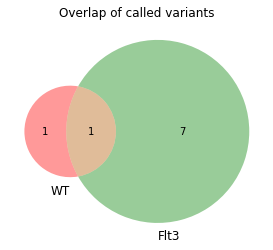

In [28]:
%matplotlib inline
venn2([set(wt_AF_by_cell.columns.values),set(flt3_AF_by_cell.columns.values)],set_labels=["WT","Flt3"])
plt.title("Overlap of called variants")
plt.savefig(join(outdir,"overlap_variants_with_without_ligand.png"))

## Plot the lineage tracing 

### With only the overlapping variants

In [29]:
all_cells_var_overlap = all_cells_var_overlap.drop((all_cells_var_overlap==0).all(axis=0).where(lambda x: x==True).dropna().index,axis=1)
all_cells_var_overlap = all_cells_var_overlap.drop((all_cells_var_overlap==0).all(axis=1).where(lambda x: x==True).dropna().index,axis=0)

In [30]:
pd.DataFrame(index=flt3_AF_by_cell.index, data={"Sample":["Flt3"]*flt3_AF_by_cell.index.shape[0]})

,Sample
CACACAATCACGCGGT-1_flt3,Flt3
ATCGAGTAGTGGCACA-1_flt3,Flt3
GTTCGGGCACATTTCT-1_flt3,Flt3
CTGAAACTCTTTACGT-1_flt3,Flt3
CGTTCTGAGCTAGCCC-1_flt3,Flt3
...,...
CGAATGTTCCAGAAGG-1_flt3,Flt3
TGGGAAGCAACGATGG-1_flt3,Flt3
CAGCCGACACGAGGTA-1_flt3,Flt3
CTCAGAATCTTGTACT-1_flt3,Flt3


In [31]:

row_meta = pd.concat((pd.DataFrame(index=flt3_AF_by_cell.index, data={"Sample":["Flt3"]*flt3_AF_by_cell.index.shape[0]}),
           pd.DataFrame(index= wt_AF_by_cell.index, data={"Sample":["wt"]*wt_AF_by_cell.index.shape[0]})))
row_meta = row_meta.loc[all_cells_var_overlap.index]
row_meta

,Sample
GTTCTCGGTCACTGGC-1_wt,wt
GACAGAGGTAATCGTC-1_wt,wt
GGAAAGCAGCCACGCT-1_wt,wt
ACGCAGCTCTGGGCCA-1_wt,wt
CATCCACAGTGTCCCG-1_wt,wt
...,...
CGGAGCTTCAACCAAC-1_flt3,Flt3
TTATGCTGTTACGACT-1_flt3,Flt3
TGGGAAGCAACGATGG-1_flt3,Flt3
CAGCCGACACGAGGTA-1_flt3,Flt3


cmap None


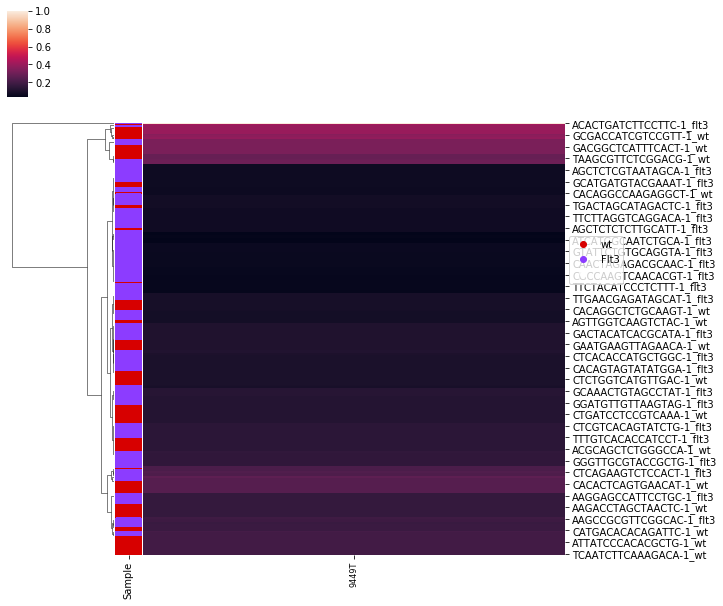

In [40]:
%matplotlib inline
cluster_help.plot_cluster(df=all_cells_var_overlap, row_meta=row_meta, col_meta=None,
                 fsave=None, to_z=False, to_col_clust=False,
                 to_row_clust=True, name=None, col_names=True,
                 row_names=True, to_legend=True, method="average", white_name=None)
plt.savefig(join(outdir,"lineage_OnlyoverlapVariants.png"))

## Plot number of overlapping positions from Flt3 and without

### With all variants

cmap None


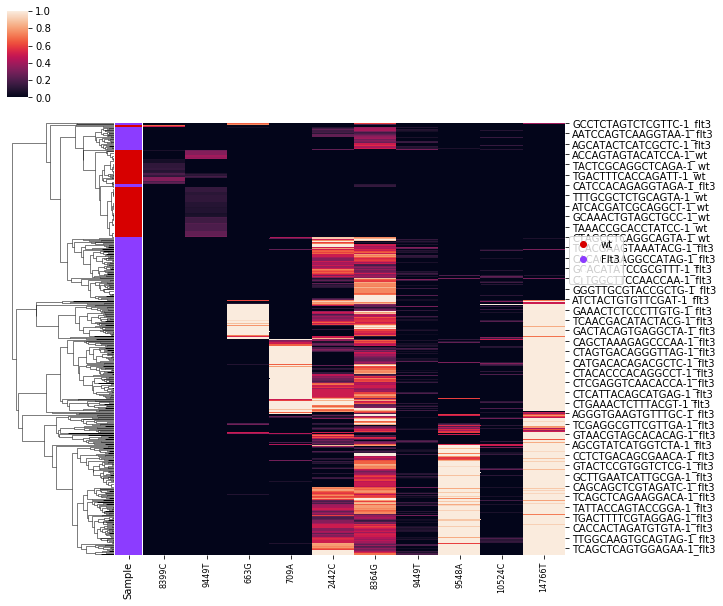

In [41]:
all_cells = all_cells.fillna(0)
all_cells = all_cells.drop((all_cells==0).all(axis=0).where(lambda x: x==True).dropna().index,axis=1)

all_cells = all_cells.drop((all_cells==0).all(axis=1).where(lambda x: x==True).dropna().index,axis=0)

# row_meta = pd.concat((pd.DataFrame(index=flt3_cell, data={"Sample":["Flt3"]*flt3_cell.shape[0]}),
#            pd.DataFrame(index=wt_cell, data={"Sample":["wt"]*wt_cell.shape[0]})))
# row_meta = row_meta.loc[all_cells.index]

row_meta = pd.concat((pd.DataFrame(index=flt3_AF_by_cell.index, data={"Sample":["Flt3"]*flt3_AF_by_cell.index.shape[0]}),
           pd.DataFrame(index= wt_AF_by_cell.index, data={"Sample":["wt"]*wt_AF_by_cell.index.shape[0]})))
row_meta = row_meta.loc[all_cells.index]
row_meta


g = cluster_help.plot_cluster(df=all_cells, row_meta=row_meta, col_meta=None,
                 fsave=None, to_z=False, to_col_clust=False,
                 to_row_clust=True, name=None, col_names=True,
                 row_names=True, to_legend=True, method="average", white_name=None)
plt.savefig(join(outdir,"lineage_AllVariants.png"))

## Clustering

In [ ]:
import numpy as np

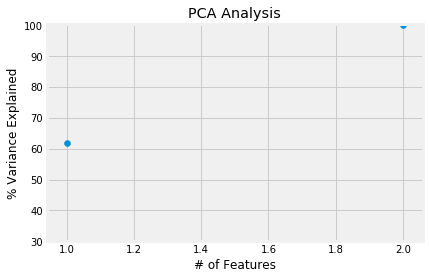

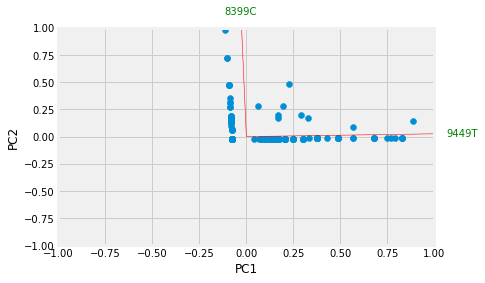

IndexError: index 2 is out of bounds for axis 0 with size 2

In [42]:
from src.utils import construct_pca
%matplotlib inline
construct_pca(wt_AF_by_cell)